In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from scipy import interpolate as sp

In [137]:
hbar = 1.054571817e-34
C = 1e-12 # Circuit capacitance 1 pF
C_c = 1e-15 # Coupling capacitance 1 fF
C_tot = C + C_c
omega = 2*np.pi*5e9 # qubit frequency 5 GHz
T_sep = 2*np.pi/omega # time between pulses
K_j = 483597.8484e9 # flux quantum Hz/V
Phi_0 = 2.067833758e-15 # flux quantum Wb
V_max = 2e-3 # pulse height 2 mV
pulse_width = 1/(V_max*K_j)
delta_theta = C_c*Phi_0*np.sqrt((2*omega)/(hbar*C_tot))
T_tot = (int(np.pi/(2*delta_theta)) + 1) * T_sep
n = round(np.pi/(delta_theta))
print("pulse width = ",pulse_width*1e12,' ps')
print("Seperation time = ",T_sep*1e12,' ps')
print("delta theta = ",delta_theta)
print("pulses for a pi/2 rotation = ",np.pi/(2*delta_theta))
print("Total time for a pi/2 rotation= ",T_tot*1e9,' ns')
print("n = ", n)


pulse width =  1.033916924267275  ps
Seperation time =  200.0  ps
delta theta =  0.050448753037350386
pulses for a pi/2 rotation =  31.136474783270405
Total time for a pi/2 rotation=  6.4  ns
n =  62


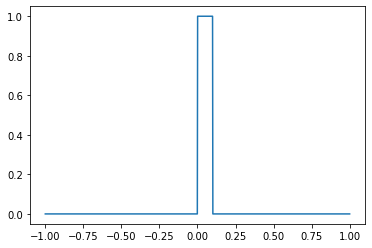

In [182]:
# def ddf(x,width):
#     val = np.zeros_like(x)
#     val[(-(width/2)<=x) & (x<=(width/2))] = 1
#     return val

def ddf(x,width):
    val = np.zeros_like(x)
    val[(0<=x) & (x<=(width))] = 1
    return val

plt.plot(np.linspace(-1,1,1000),ddf(np.linspace(-1,1,1000),0.1))

### Hamiltonian Evoluation without SFQ pulses

a1 = 15707963267.948965
a2 = 24396909491.478756


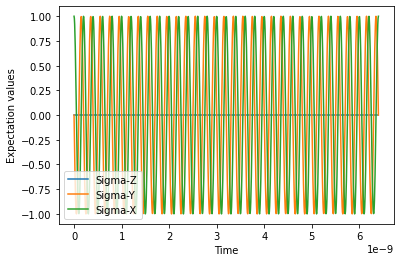

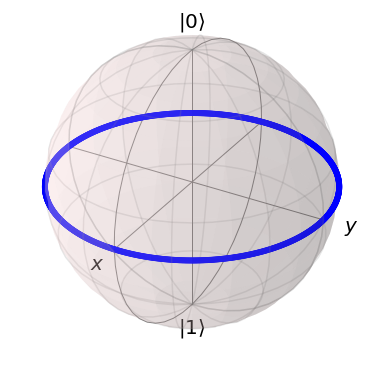

In [139]:
hbar = 1.054571817e-34
a1 = omega*0.5 # divided by hbar
a2 = C_c*0.002*np.sqrt(hbar * omega /(2*C_tot)) * (1/hbar)
print("a1 =", a1)
print("a2 =", a2)

H_free = a1*(qeye(2) - sigmaz())

times = np.linspace(0,T_tot,1000)

#psi0 = basis(2, 0) # |0>
psi0 = basis(2, 0) + (1+0j)*qutip.basis(2, 1) # |+>

result = sesolve(H_free, psi0, times, [sigmaz(), sigmay(),sigmax()])
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0]) 
ax.plot(result.times, result.expect[1]) 
ax.plot(result.times, result.expect[2]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Sigma-Z", "Sigma-Y","Sigma-X")) 
plt.show() 

exp_z = result.expect[0]
exp_y = result.expect[1]
exp_x = result.expect[2]

b = qutip.Bloch()
b.make_sphere()
pnts = [exp_x,exp_y,exp_z]
b.add_points(pnts)
b.render()
b.show()




### Hamiltonian Evolution with SFQ pulses

n =  62
a1 = 15707963267.948967
a2 = 24396909491.478756


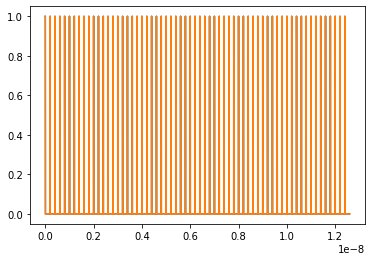

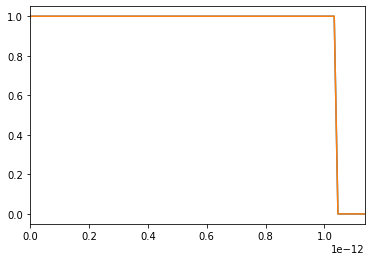

In [192]:
hbar = 1.054571817e-34
a1 = hbar*omega*0.5 * (1/hbar)
a2 = C_c*0.002*np.sqrt(hbar * omega /(2*C_tot)) * (1/hbar)

#n = round(np.pi/(2*delta_theta)) # for a pi/2 rotation about the y axis
n = round(np.pi/(delta_theta)) # for a pi rotation about the y axis
T_tot = (n + 1) * T_sep


print("n = ",n)
print("a1 =", a1)
print("a2 =", a2)

n_points = 1000000

times = np.linspace(0,T_tot,n_points)
pulses = ddf(times,pulse_width)
for i in range(n):
    pulses = np.add(pulses,ddf(times-(i+1)*T_sep,pulse_width))
pulse_func = sp.interp1d(times,pulses,fill_value="extrapolate")

plt.plot(times,pulses)
plt.plot(times,pulse_func(times))
plt.show()

plt.plot(times,pulses)
plt.plot(times,pulse_func(times))
plt.xlim(0,pulse_width*1.1)
plt.show()



93.40942434981122
n =  92
a1 = 15707963267.948967
a2 = 24396909491.478756
10.0%. Run time:  29.30s. Est. time left: 00:00:04:23
20.0%. Run time:  58.35s. Est. time left: 00:00:03:53
30.0%. Run time:  87.38s. Est. time left: 00:00:03:23
40.0%. Run time: 116.37s. Est. time left: 00:00:02:54
50.0%. Run time: 145.39s. Est. time left: 00:00:02:25
60.0%. Run time: 174.42s. Est. time left: 00:00:01:56
70.0%. Run time: 203.49s. Est. time left: 00:00:01:27
80.0%. Run time: 232.58s. Est. time left: 00:00:00:58
90.0%. Run time: 261.61s. Est. time left: 00:00:00:29
Total run time: 290.54s


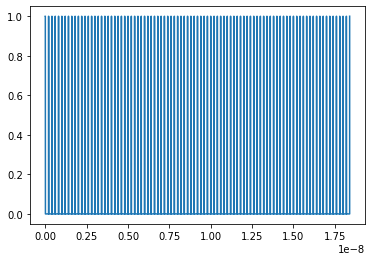

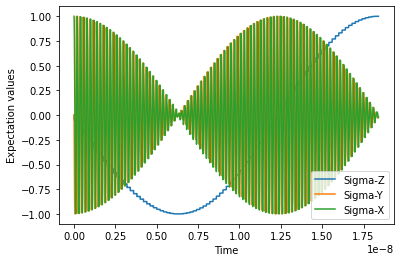

In [206]:
hbar = 1.054571817e-34
a1 = hbar*omega*0.5 * (1/hbar)
a2 = C_c*0.002*np.sqrt(hbar * omega /(2*C_tot)) * (1/hbar)

theta = (3/2)*np.pi #rotation angle

#n = round(np.pi/(2*delta_theta)) # for a pi/2 rotation about the y axis
print(theta/delta_theta)
n = round(theta/(delta_theta)) -1 # for a pi rotation about the y axis
T_tot = (n) * T_sep


print("n = ",n)
print("a1 =", a1)
print("a2 =", a2)

times = np.linspace(0,T_tot,n_points)
pulses = ddf(times,pulse_width)
for i in range(n):
    pulses = np.add(pulses,ddf(times-(i+1)*T_sep,pulse_width))
pulse_func = sp.interp1d(times,pulses,fill_value="extrapolate")

#plt.plot(times,pulses)
plt.plot(times,pulse_func(times))

def H1_coeffs(t,args):
    return pulse_func(t)

H0 = a1*(qeye(2) - sigmaz())
H1 = a2*sigmay()

H = [H0,[H1,H1_coeffs]]

#psi0 = basis(2, 0)
psi0 = basis(2, 0) + (1+0j)*qutip.basis(2, 1) # |+>

result = sesolve(H, psi0, times, [sigmaz(), sigmay(),sigmax()],progress_bar=True)
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0]) 
ax.plot(result.times, result.expect[1]) 
ax.plot(result.times, result.expect[2]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Sigma-Z", "Sigma-Y","Sigma-X")) 
plt.show() 

exp_z = result.expect[0]
exp_y = result.expect[1]
exp_x = result.expect[2]

# b = qutip.Bloch()
# b.make_sphere()
# pnts = [exp_x,exp_y,exp_z]
# b.add_points(pnts)
# b.render()
# b.show()


1.84e-08
0.0
P1 =  0.999535316785551


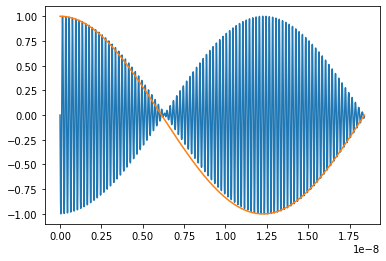

In [207]:
plt.plot(times,exp_y)
T_tot = (n) * T_sep
print(T_tot)
plt.plot(times,np.cos((3/2)*np.pi*times*(1/T_tot)))
print(exp_z[0])
print("P1 = ",abs(exp_z[-1]))

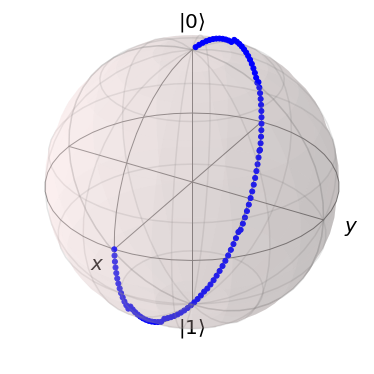

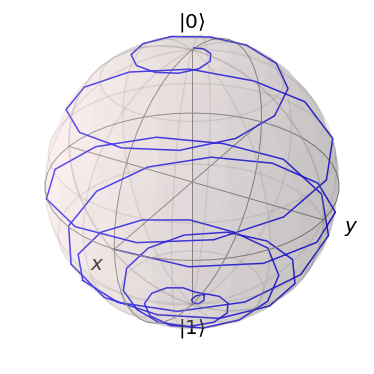

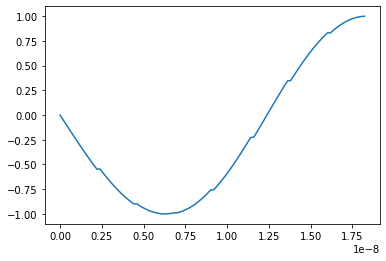

In [218]:
exp_z = result.expect[0]
#y_list = np.cos(np.pi*times*(1/T_tot))
y_list = [i*0 for i in result.expect[1]]
#x_list = [i*0 for i in result.expect[2]]
x_list = np.cos((3/2)*np.pi*times*(1/T_tot))
nskip = 10000
z_list = exp_z[::nskip]
y_list = y_list[::nskip]
x_list = x_list[::nskip]

plt.plot(times[::nskip],z_list)
b = qutip.Bloch()
b.make_sphere()
pnts = [x_list,y_list,z_list]
b.add_points(pnts)
b.render()
b.show()


b = qutip.Bloch()
b.make_sphere()
pnts = [exp_x[::nskip],exp_y[::nskip],exp_z[::nskip]]
b.add_points(pnts,meth='l')
b.render()
b.show()
